# Supplementary material for chapter 5.2: Exact decay for piecewise functions
see https://arxiv.org/abs/2305.00066

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Polynom_Cm1, Polynom_C0, Polynom_C1, Polynom_C2, Polynom_C3, Polynom_C4, Polynom_C5
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc, Fourier

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

fs = 10
fs_lbl = 6
plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = fs
plt.rcParams['axes.titlesize'] = fs
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['legend.labelspacing'] = 0.0
plt.rcParams['legend.fontsize'] = fs_lbl
plt.rcParams['legend.handlelength'] = 1.0

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')
pth = "../Plots/"

8.030570172000001


In [4]:
import sys, numpy, scipy, matplotlib
print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)
print("matplotlib version:", matplotlib.__version__)

Python version: 3.6.8 (default, May 31 2023, 10:28:59) 
[GCC 8.5.0 20210514 (Red Hat 8.5.0-18)]
NumPy version: 1.19.5
SciPy version: 1.5.4
matplotlib version: 3.3.4


In [5]:
VALIDATE = False  # includes SVD + numerical error computation

In [6]:
m, n, r = 2500, 2500, 2500
#m, n, r = 1000, 1000, 1000
x = Domain([0, 1], m)
mu = Domain([0, 1], n)

## $g_m$ as described in equ. 5.2 for $m=0, 1, 2, 3, 4, 5$

In [7]:
results = np.zeros((6, 9, 4, r))
epsilon = 0.025
u_m1 = Polynom_Cm1()
u_0 = Polynom_C0()
u_1 = Polynom_C1()
u_2 = Polynom_C2()
u_3 = Polynom_C3()
u_4 = Polynom_C4()
u_5 = Polynom_C5()
initc = [u_m1, u_0, u_1, u_2, u_3, u_4, u_5]

## plot $g_m$ and $u(mu; x)$ for some $\mu$

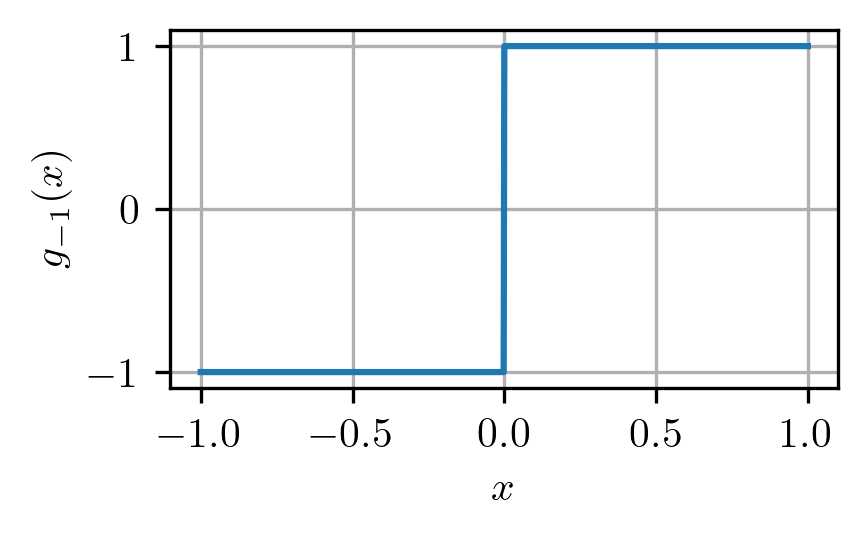

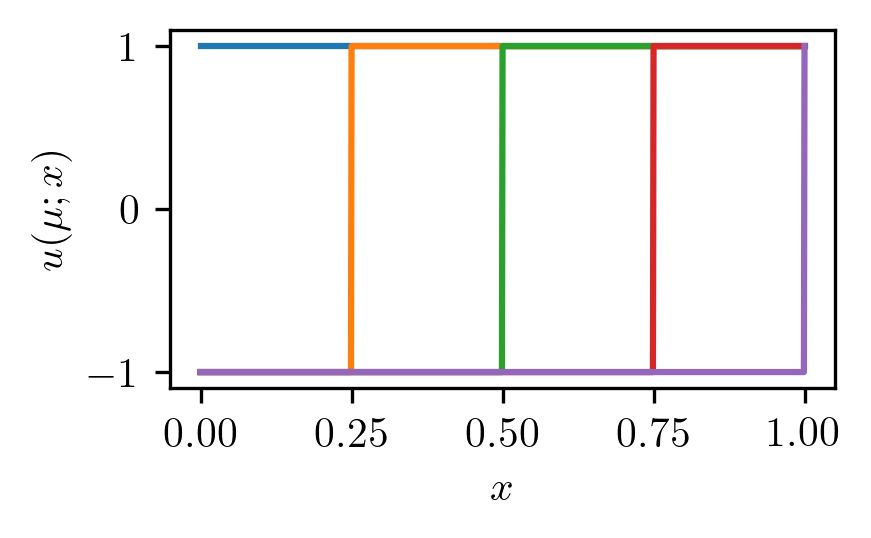

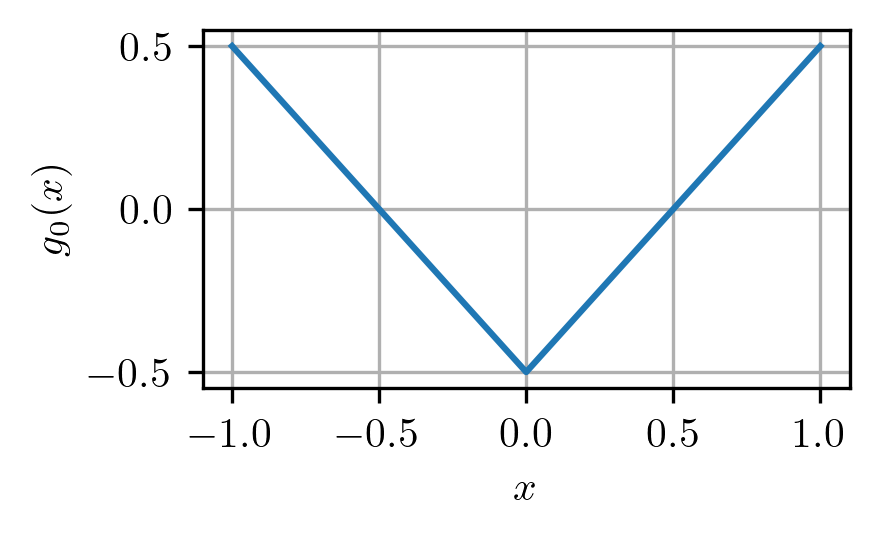

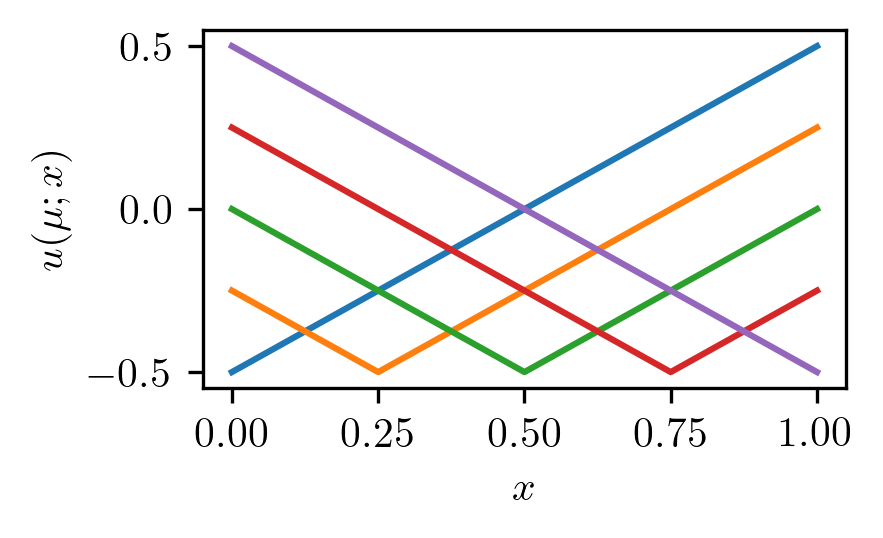

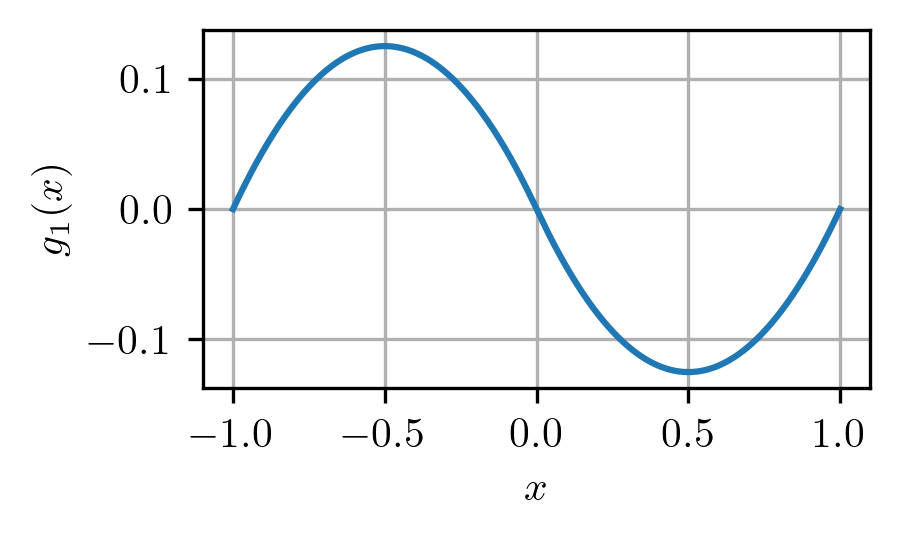

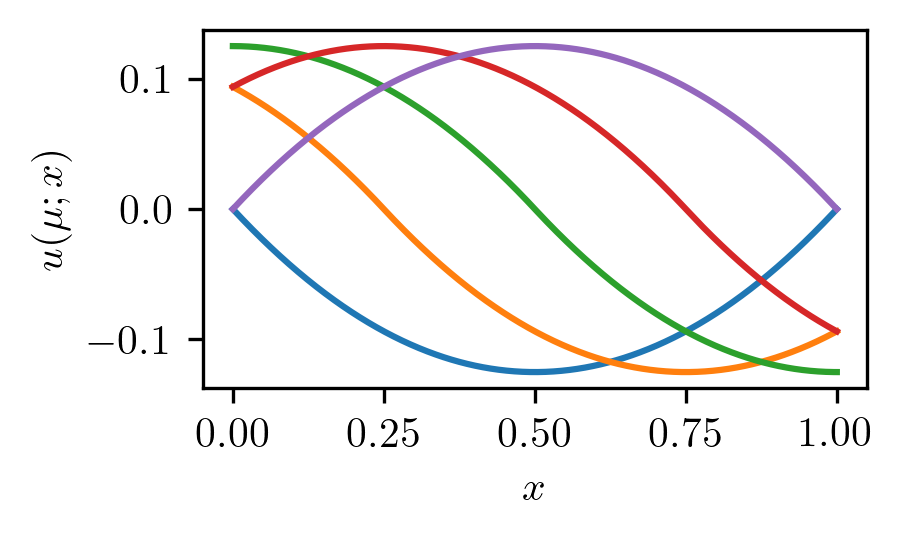

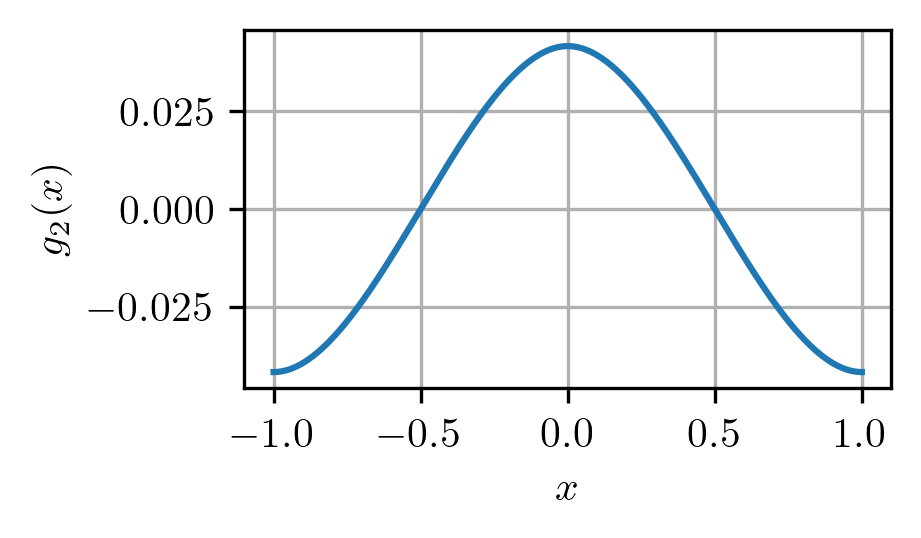

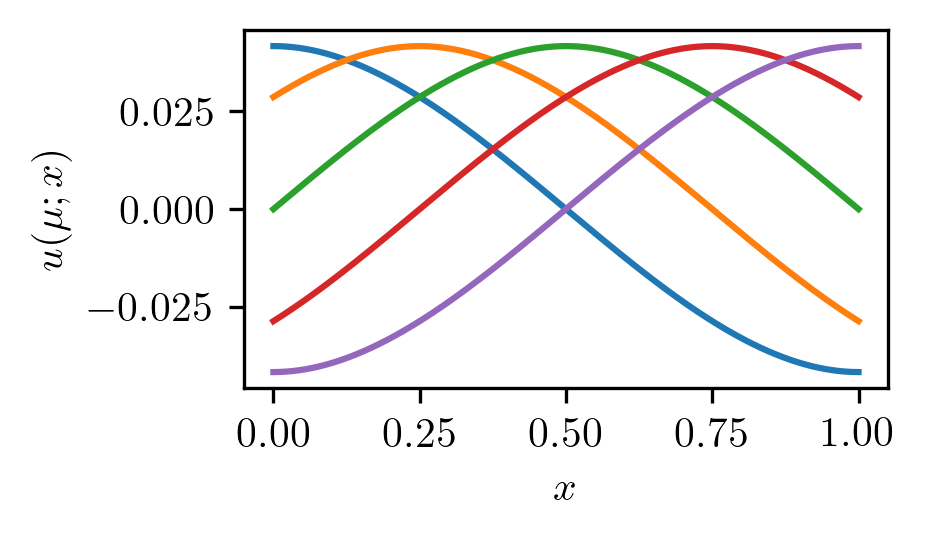

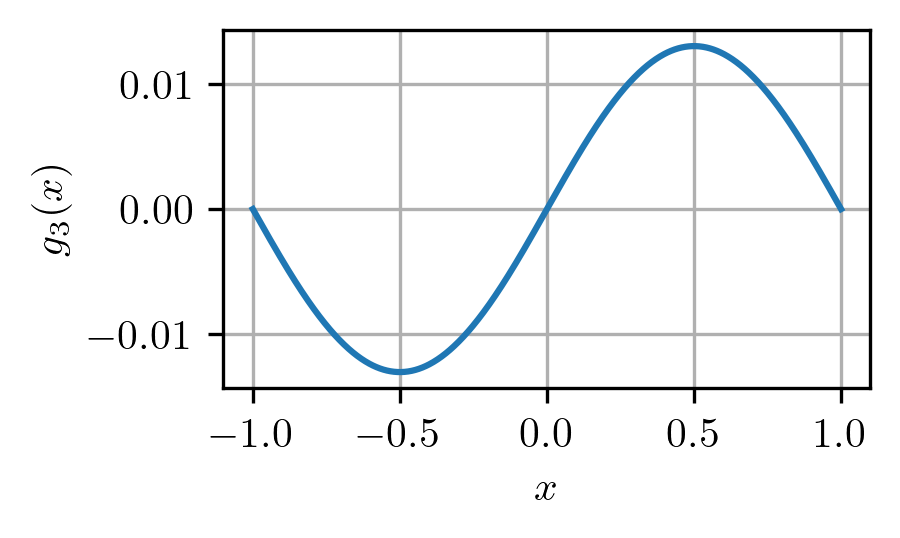

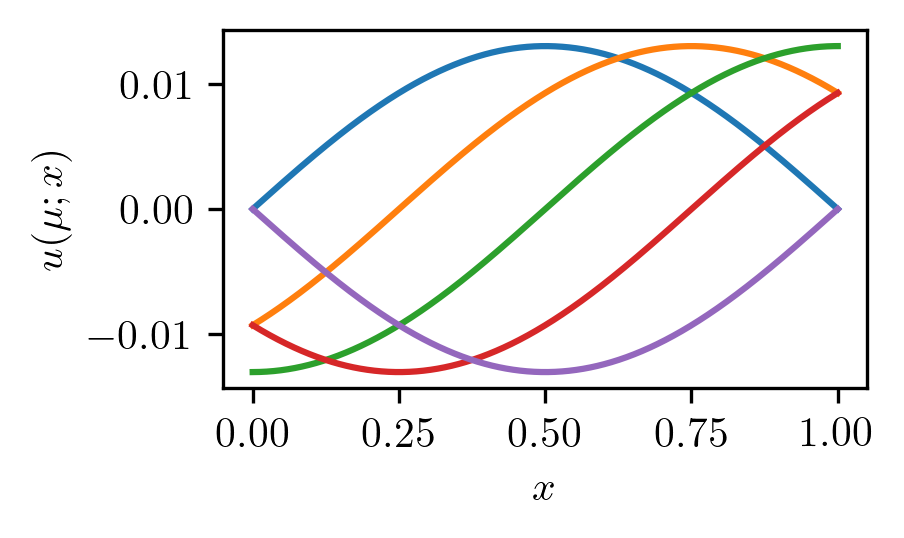

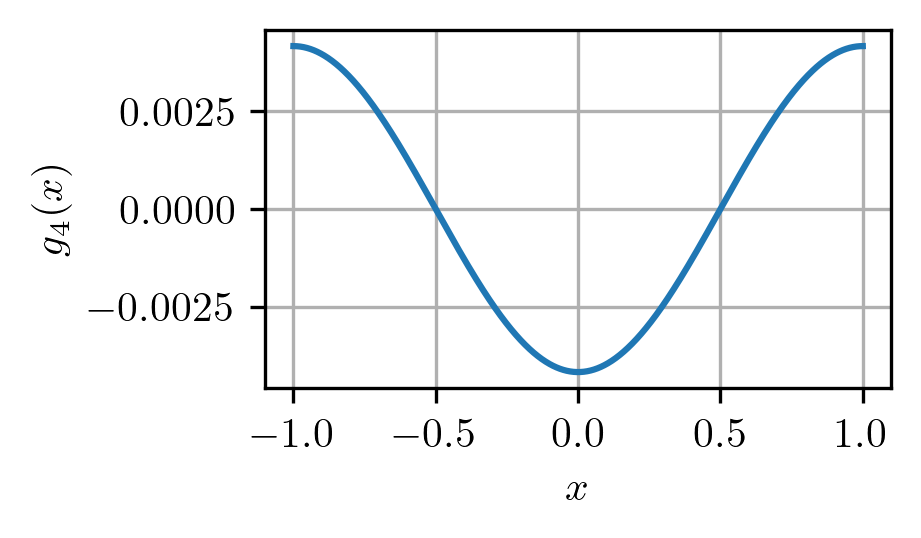

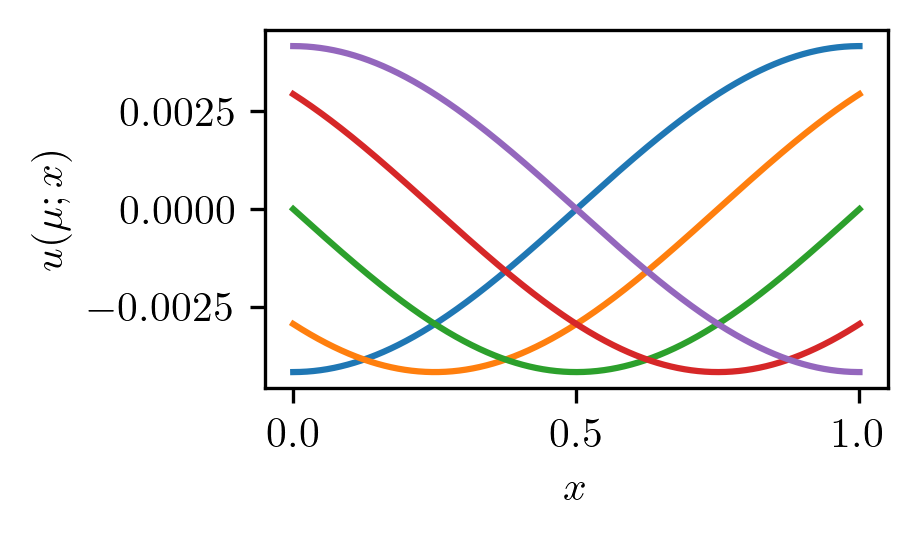

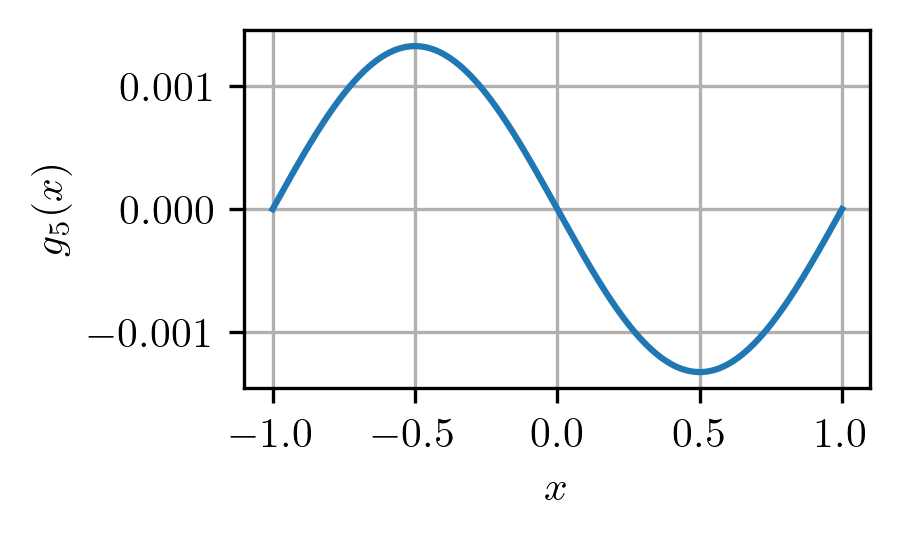

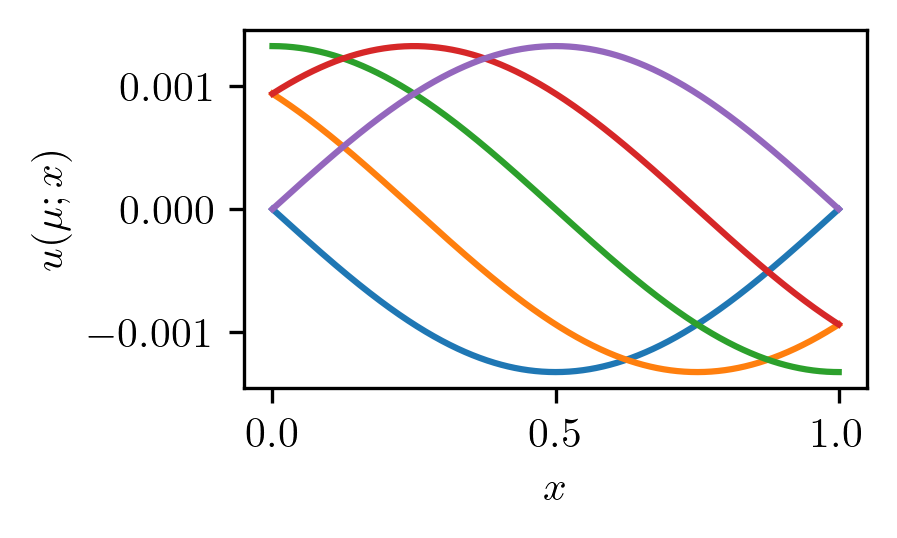

In [8]:
u_k = u_1
for u_k in initc:
    u_k.plot_q()
    fig, ax = plt.subplots()
    for mu_j in [0.0, 0.25, 0.5, 0.75, 1.0]:
        u_k.plot_u(mu_j, ax=ax, label=r'$u(\mu={:.2f}; x)$'.format(mu_j))
    plt.grid()
    plt.show()

#X = u_k(x(), mu())
#plt.imshow(X)

## plot all $g_m$ in one plot

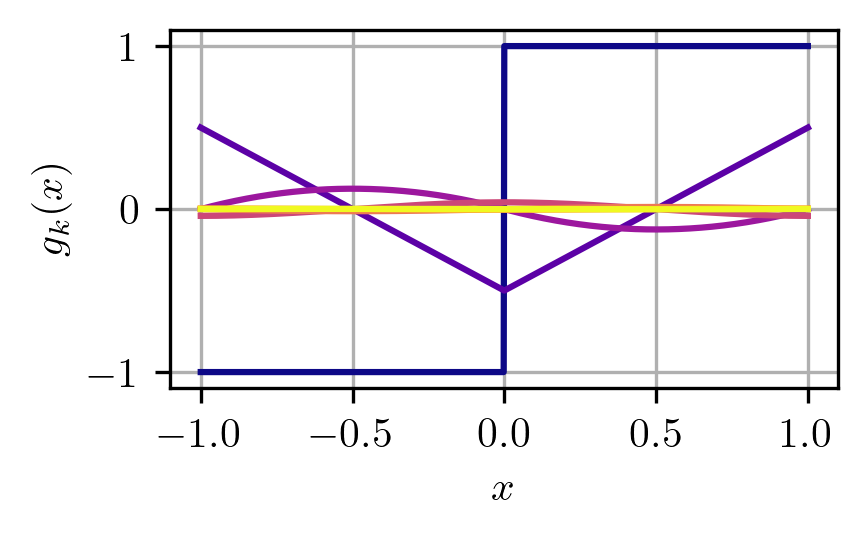

In [9]:
fig, ax = plt.subplots()
for j, u_k in enumerate(initc):
    color = cmap(j/6)
    u_k.plot_q(ax=ax, label=r'$u(\mu={:.2f}; x)$'.format(mu_j), color=color)
ax.set_ylabel("$g_k(x)$")
plt.show()

## generate the basis, sort it for each snapshot matrix and calculate the error

$g_{-1}$ :


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


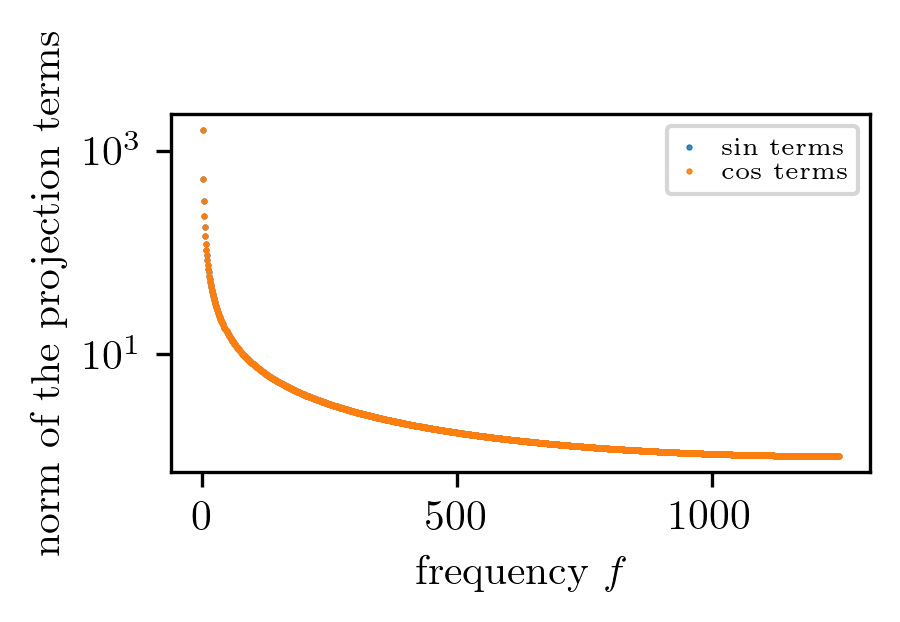

$g_0$ :


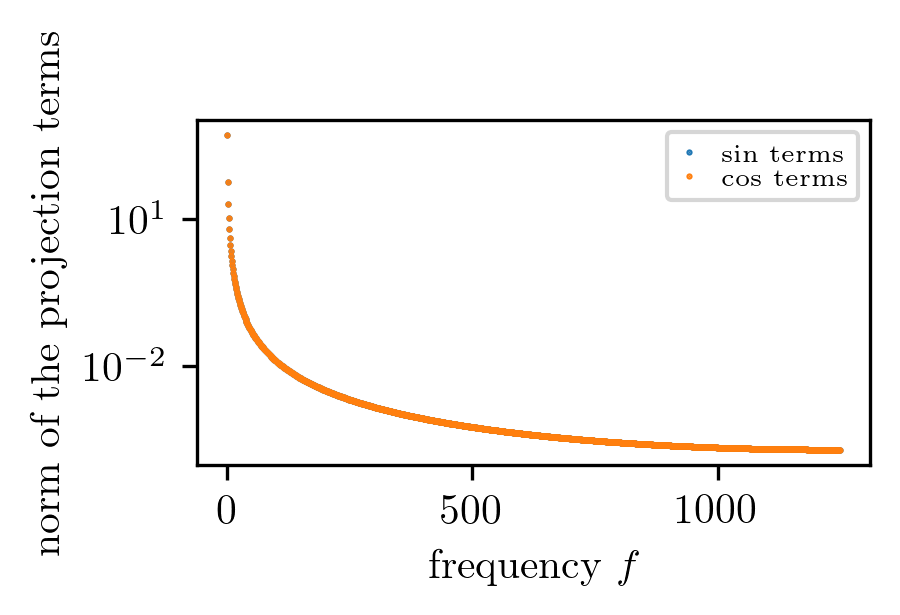

$g_1$ :


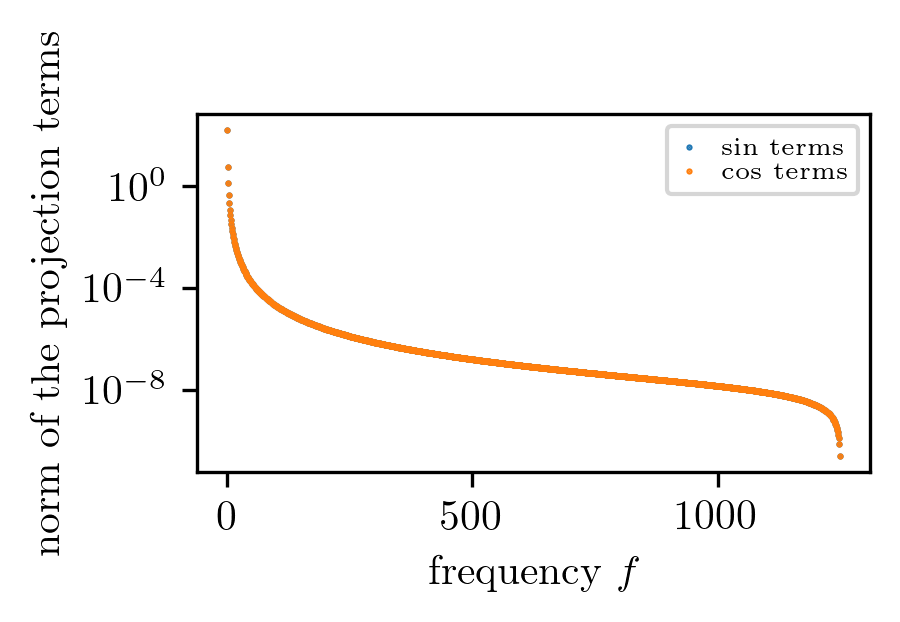

$g_2$ :


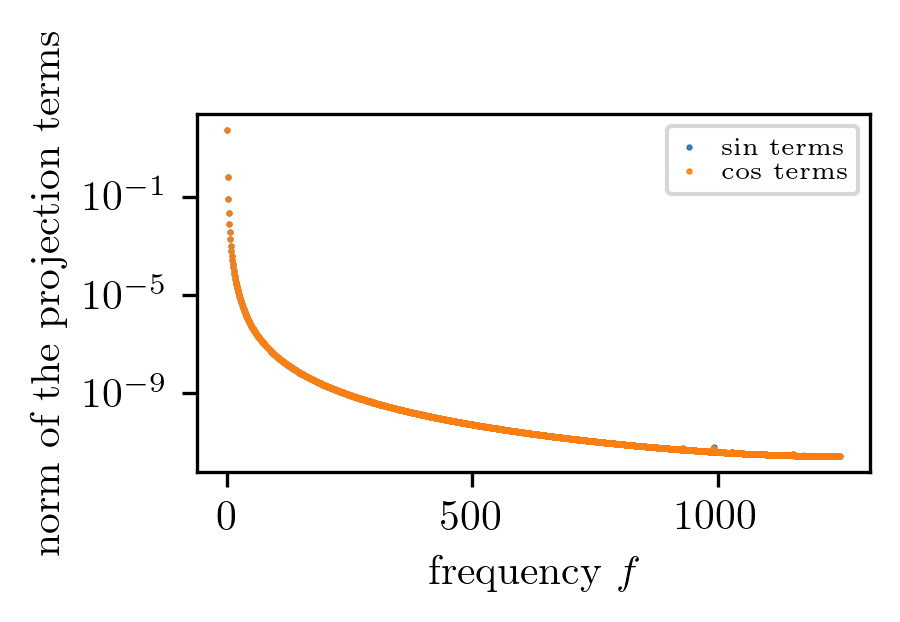

$g_3$ :


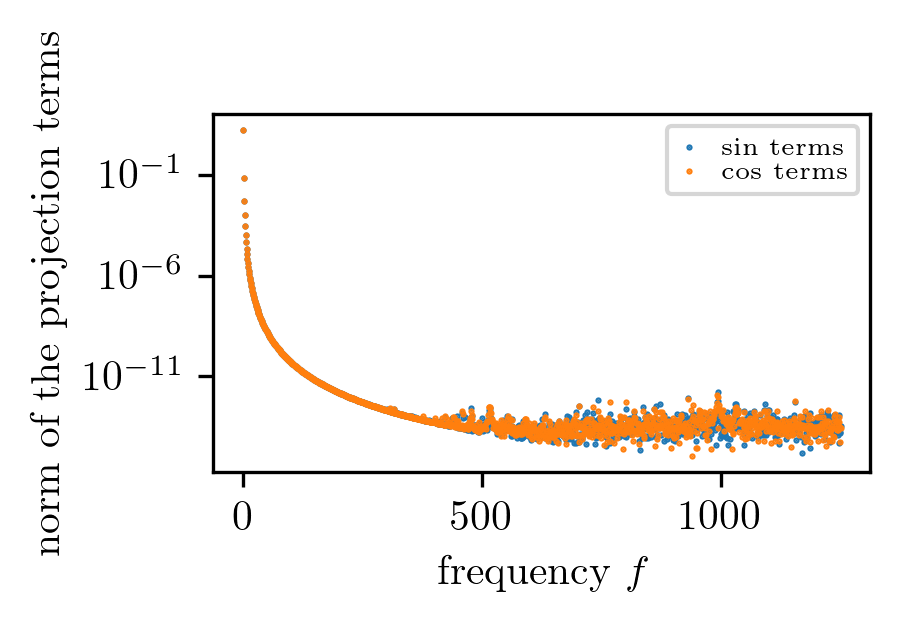

$g_4$ :


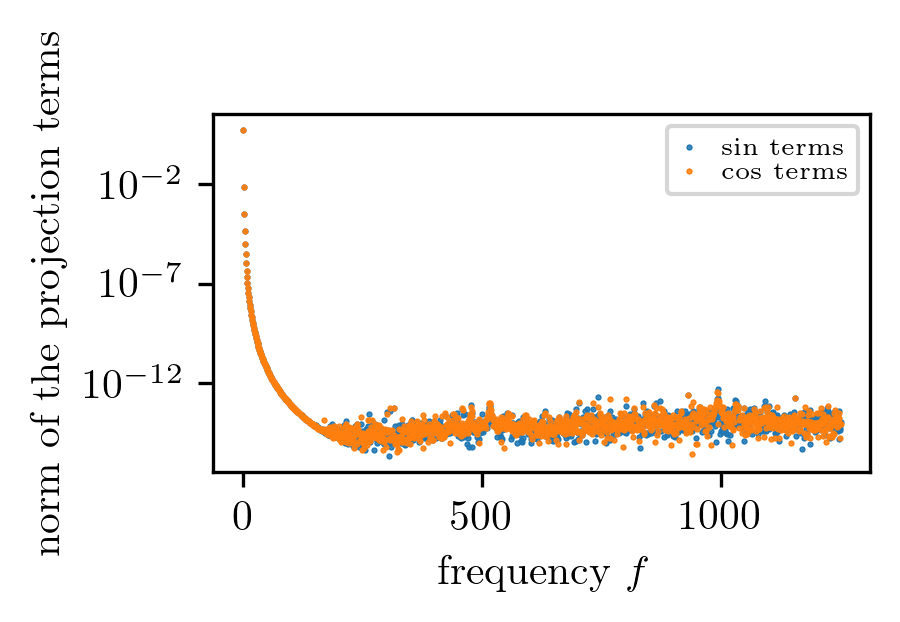

$g_5$ :


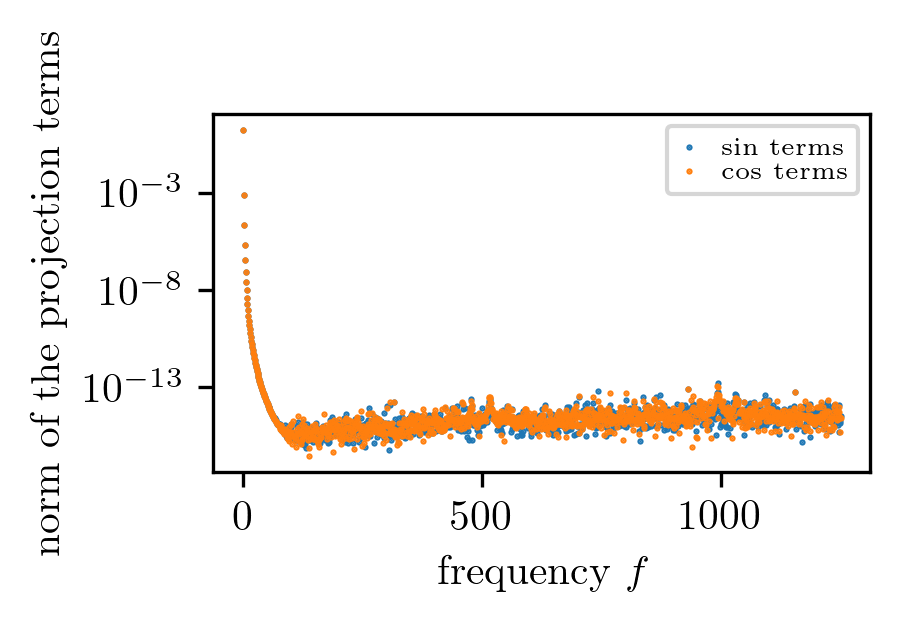

In [10]:
trig_basis_odd = TrigonometricOdd(x())

delta_Ns = np.zeros((len(initc), r))  # keep them for plotting
if VALIDATE:
    d_Ns = np.zeros((len(initc), r))
    delta_Ns2 = np.zeros((len(initc), r))
for j, u_k in enumerate(initc):
    print(u_k.name, ":")
    X = u_k(x(), mu())
    trig_basis_odd.sort(X, True)

    delta_N, S = trig_basis_odd.calc_error_analytic(X)
    delta_Ns[j] = delta_N

    if VALIDATE:
        svd_basis = SVD(X)  # slow
        delta_n2, d_N = svd_basis.calc_error(X)  # very slow
        delta_Ns2[j] = delta_n2
        d_Ns[j] = d_N

        #fig, ax = plt.subplots()
        #plt.plot(S2-S, "k.", ms=1)
        #ax.set_yscale('log')
        #plt.show()

In [11]:
def L2(y, n):
    dy = np.diff(y.ravel(), n=n) * len(y)**n
    return np.mean(dy**2)**.5

## plot $d_{N, numerical}$ as well as the expected $d_{N, analytical}$ from theorem 5.6

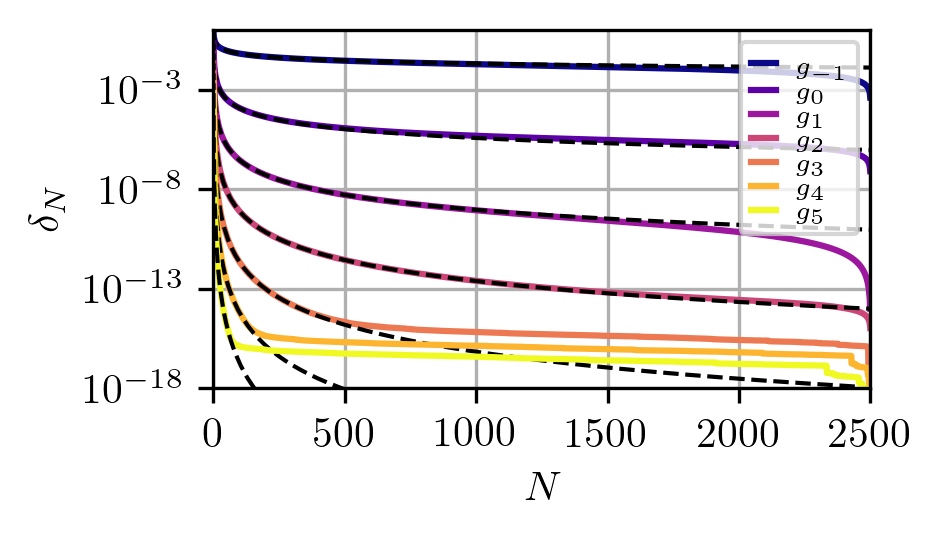

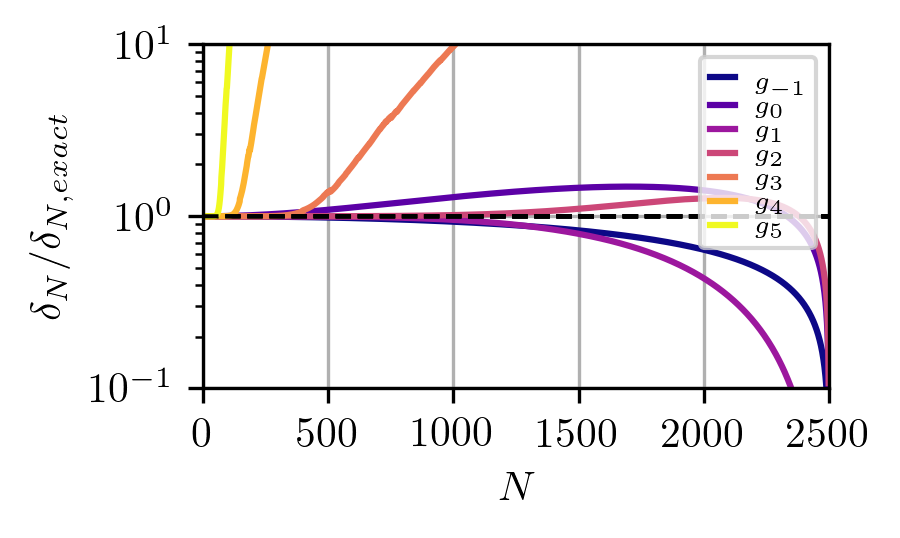

In [12]:
N = np.arange(1, r+1)
Ninf = np.arange(1, 1000000, dtype=np.float64)
fig, ax = plt.subplots(tight_layout=True)
fig2, ax2 = plt.subplots(tight_layout=True)
for j, u_k in enumerate(initc):  # 9
    color = cmap(j/6)
    ax.plot(N[:-1], delta_Ns[j][1:], "-", color=color, ms=1, label=u_k.name)
    if VALIDATE:
        ax.plot(N, delta_Ns2[j], ".", color="g", ms=2)
        ax.plot(N, d_Ns[j], ".", color="r", ms=2)

    k = j-1
    y = u_k.q(np.linspace(-1, 1, 1000))
    f_L2 = L2(y, k+1)
    d_exact = np.cumsum((4*(1/((2*np.floor((Ninf+1)/2)-1)*np.pi))**(2*k+4))[::-1])[::-1][N]**.5
    d_upper = f_L2 * 2*(2*k+3)**.5 / np.pi**(k+2) * N**(-(k+1.5)) # Theorem 6.2 upper bound
    d_lower = 2/(2*k+3)**.5 / np.pi**(k+2) * (N+1)**(-(k+1.5)) # Theorem 6.2 lower bound
        
    model = d_exact

    ax2.plot(N[:-1], delta_Ns[j][1:]/model[:-1], color=color, label=u_k.name)  # TODO
    ax2.plot(N, np.ones_like(N), "k--", lw=1)
    ax.plot(N, model, "k--", lw=1, ms=0)
    #ax.plot(N, model, "--", color=color, ms=0)
    #print("{:.2E}".format(C_estimated))
ax.set_yscale('log')
#plt.title(u_k.name)
ax.legend(loc="upper right")
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\delta_N$')
ax.set_xlim([0, r])
ax.set_ylim([1e-18, 1e0])

ax2.legend()
ax2.set_yscale('log')
ax2.set_xlim([0, r])
ax2.set_ylim([0.9, 1.1])
ax2.set_ylim([0.1, 10])
ax2.set_xlabel(r'$N$')
ax2.set_ylabel(r'$\delta_N / \delta_{N, exact}$')

ax.grid()
ax2.grid()

fig.savefig(pth+"exact_d_N.pdf")
fig2.savefig(pth+"exact_approx_ratio.pdf")
plt.show()